(gallery-vis-mpl-streamplot)=

# Matplotlib Streamplot

## Example 1: Cuboid Magnet

In this example we show the B-field of a cuboid magnet using Matplotlib streamlines. Streamlines are not magnetic field lines in the sense that the field amplitude cannot be derived from their density. However, Matplotlib streamlines can show the field amplitude via color and line thickness. One must be careful that streamlines can only display two components of the field. In the following example the third field component is always zero - but this is generally not the case.

In the example we make use of the [scaling property](docu-api-scale-invariance). We assume that all length inputs are in units of mm, and that the polarization input is in units of millitesla. The resulting `getB` output will also be in millitesla. One must be careful with scaling - the conversion to H would ofc give units of mA/m.

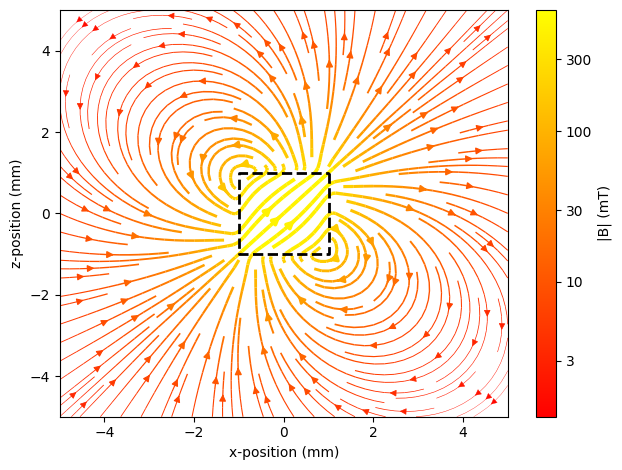

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xz-symmetry plane
ts = np.linspace(-5, 5, 40)
grid = np.array([[(x, 0, z) for x in ts] for z in ts])

# Compute the B-field of a cube magnet on the grid
cube = magpy.magnet.Cuboid(polarization=(500,0,500), dimension=(2,2,2))
B = cube.getB(grid)
log10_norm_B = np.log10(np.linalg.norm(B, axis=2))

# Display the B-field with streamplot using log10-scaled
# color function and linewidth
splt = ax.streamplot(
    grid[:, :, 0],
    grid[:, :, 2],
    B[:, :, 0],
    B[:, :, 2],
    density=1.5,
    color=log10_norm_B,
    linewidth=log10_norm_B,
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="|B| (mT)")
ticks = np.array([3, 10, 30, 100, 300])
cb.set_ticks(np.log10(ticks))
cb.set_ticklabels(ticks)

# Outline magnet boundary
ax.plot(
    [1, 1, -1, -1, 1],
    [1, -1, -1, 1, 1],
    "k--",
    lw=2,
)

# Figure styling
ax.set(
    xlabel="x-position (mm)",
    ylabel="z-position (mm)",
)

plt.tight_layout()
plt.show()

```{note}
Be aware that the above code is not very performant, but quite readable. The following example creates the grid with numpy commands only instead of Python loops, and uses the {ref}`gallery-tutorial-field-computation-functional-interface` for field computation.
```

## Example 2 - Hollow Cylinder Magnet

A nice visualization is achieved by combining `streamplot` with `contourf`. In this example we show the B-field of a hollow Cylinder magnet with diametral polarization in the xy-symmetry plane.

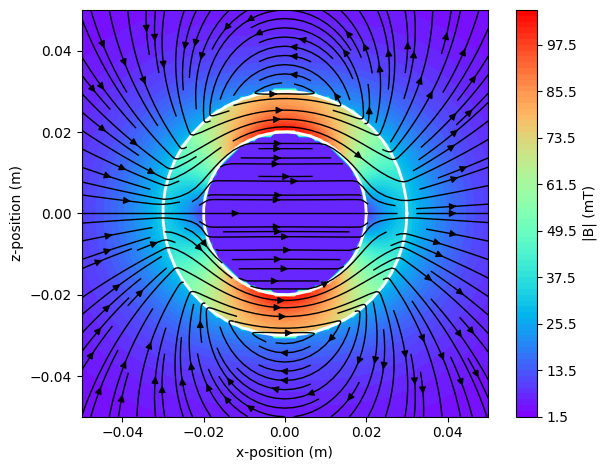

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import magpylib as magpy

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Create an observer grid in the xy-symmetry plane - using pure numpy
X, Y = np.mgrid[-0.05:0.05:100j, -0.05:0.05:100j].transpose((0, 2, 1))
grid = np.stack([X, Y, np.zeros((100, 100))], axis=2)

# Compute magnetic field on grid - using the functional interface
B = magpy.getB(
    "CylinderSegment",
    observers=grid.reshape(-1, 3),
    dimension=(0.02, 0.03, 0.05, 0, 360),
    polarization=(0.1, 0, 0),
)
B = B.reshape(grid.shape)
normB = np.linalg.norm(B, axis=2)

# combine streamplot with contourf
cp = ax.contourf(
    X,
    Y,
    normB*1000, #T->mT
    cmap="rainbow",
    levels=100,
    zorder=1,
)
splt = ax.streamplot(
    X,
    Y,
    B[:, :, 0],
    B[:, :, 1],
    color="k",
    density=1.5,
    linewidth=1,
    zorder=3,
)

# Add colorbar
fig.colorbar(cp, ax=ax, label="|B| (mT)")

# Outline magnet boundary
ts = np.linspace(0, 2 * np.pi, 50)
ax.plot(.03*np.cos(ts), .03*np.sin(ts), "w-", lw=2, zorder=2)
ax.plot(.02*np.cos(ts), .02*np.sin(ts), "w-", lw=2, zorder=2)

# Figure styling
ax.set(
    xlabel="x-position (m)",
    ylabel="z-position (m)",
    aspect=1,
)

plt.tight_layout()
plt.show()